In [1]:
import awkward as ak
import json
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt

In [2]:
with open('ungroomed_ratio_ks.json', 'r') as f:
    metrics = json.load(f)

In [3]:
metrics = pd.DataFrame([metrics[i] for i in metrics], index=list(metrics.keys()))

In [4]:
metrics

,statistic,p-value,adjusted
1e205/1e210**0.5,0.017875,8.130149e-07,1.747744
1e205/1e215**0.3333333333333333,0.024820,9.584179e-13,1.605195
1e205/1e220**0.25,0.029075,2.492271e-17,1.536484
1e205/1e225**0.2,0.032663,9.269501e-22,1.485947
1e205/1e230**0.16666666666666666,0.035600,9.053929e-26,1.448545
...,...,...,...
10e540/10e515**2.6666666666666665,0.089447,1.279708e-160,1.048435
10e540/10e520**2.0,0.093135,3.991050e-174,1.030889
10e540/10e525**1.6,0.096534,4.623035e-187,1.015321
10e540/10e530**1.3333333333333333,0.101326,4.287098e-206,0.994279


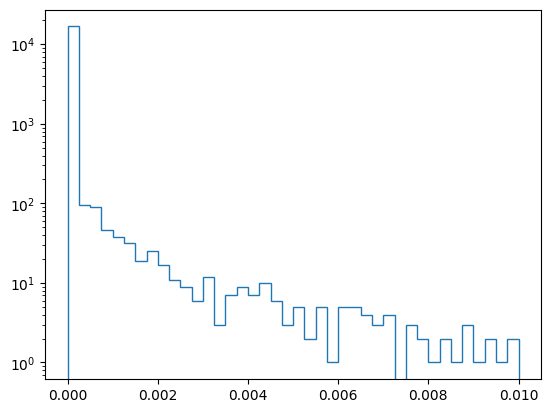

In [11]:
plt.hist(metrics['p-value'].to_numpy(), bins=40, histtype='step', range=(0,0.01))
plt.yscale('log')
plt.show()

In [111]:
max(metrics['p-value'])

0.0813331384167264

In [114]:
# metrics[(metrics['statistic'] <= 0.01285246885302024)]
metrics[(metrics['p-value'] >= 0.05)]
# metrics = metrics.loc[:, metrics.columns[(metrics.loc['roc_auc'] <= 0.7)]]

,statistic,p-value,adjusted
1e520/1e425**0.8,0.008489,0.072194,2.071149
2e515/1e430**1.0,0.008335,0.081333,2.079094


In [99]:
len(metrics[(metrics['statistic'] <= 0.01285246885302024)])

312

In [6]:
max(metrics.to_numpy(dtype='float64'))[0]

2.969768014162283

In [7]:
min(metrics.to_numpy(dtype='float64'))[0]

1.384895691309663

In [26]:
with open('ecf_list.pkl', 'wb') as f:
    pickle.dump(metrics.columns.to_list(), f)

In [57]:
metrics.columns.to_list()

['ks_score']

In [483]:
pattern = r'^\de5\^\d+\.?\d*/\de4\^\d+\.?\d*\*\*\d+\.?\d*$'

In [484]:
matching_columns = [col for col in metrics.columns if re.match(pattern, col)]

In [485]:
temp = metrics[matching_columns]

In [486]:
max(temp.iloc[0, :].to_numpy(dtype='float32'))

0.6860596

In [487]:
temp = temp.loc[:, temp.columns[(temp.loc['roc_auc'] >= 0.678)]]

In [488]:
temp

,1e5^2.5/2e4^0.5**2.5,4e5^0.5/1e4^2.0**1.0,4e5^0.5/1e4^2.5**0.8
roc_auc,0.678954,0.686060,0.678049
sculpt_metric,0.173663,0.172872,0.073843
s_sb,0.019668,0.016538,0.036127


In [ ]:
use_list = [
    '1e5^1.5/2e5^0.5**1.5',
    '3e5^0.5/1e5^2.5**0.6',
    '4e5^0.5/1e4^2.0**1.0',
    '1e5^2.5/2e4^0.5**2.5',
    '1e5^0.5/1e3^0.5**1.0',
    '1e5^0.5/1e2^4.0**0.125',
    '3e4^0.5/1e4^2.5**0.6',
    '2e4^3.0/2e3^1.0**3.0',
    '1e4^1.0/1e2^4.0**0.25',
    '1e3^4.0/3e3^0.5**2.6666666666666665',
    '3e3^3.5/1e2^3.5**3.0',
]

In [355]:
ratio_counts = {}
ratio_counts['54'] = 0
ratio_counts['53'] = 0
ratio_counts['52'] = 0
ratio_counts['43'] = 0
ratio_counts['42'] = 0
ratio_counts['32'] = 0

for i in metrics.columns:

    dash = i.find('/')
    asterisk = i.find('*')
    numerator = i[:dash]
    denominator = i[dash+1:asterisk]
    exponent = i[asterisk+2:]

    if numerator[1] == 'e':
        num = numerator[2]

    elif numerator[1] == 'e':
        num = numerator[3]

    den = denominator[2]

    ratio_counts[num+den] += 1

In [357]:
# with open('counts/sculpt_001.pkl', 'wb') as f:
#     pickle.dump(ratio_counts, f)

In [143]:
metrics

,1e3^1.5/1e2^1.5**1.0,1e3^1.5/1e2^2.0**0.75,1e3^1.5/1e2^2.5**0.6,1e3^1.5/1e2^3.0**0.5,1e3^1.5/1e2^3.5**0.42857142857142855,1e3^1.5/1e2^4.0**0.375,1e3^2.0/1e2^1.5**1.3333333333333333,1e3^2.0/1e2^2.0**1.0,1e3^2.0/1e2^2.5**0.8,1e3^2.0/1e2^3.0**0.6666666666666666,...,10e5^4.0/7e5^2.0**2.857142857142857,10e5^4.0/7e5^2.5**2.2857142857142856,10e5^4.0/7e5^3.0**1.9047619047619047,10e5^4.0/7e5^3.5**1.6326530612244898,10e5^4.0/7e5^4.0**1.4285714285714286,10e5^4.0/8e5^2.0**2.5,10e5^4.0/8e5^2.5**2.0,10e5^4.0/8e5^3.0**1.6666666666666667,10e5^4.0/8e5^3.5**1.4285714285714286,10e5^4.0/8e5^4.0**1.25
roc_auc,0.568594,0.579669,0.586344,0.591129,0.594932,0.598135,0.538876,0.558239,0.568827,0.575943,...,0.557589,0.542612,0.531576,0.536800,0.531510,0.549626,0.534527,0.542864,0.537003,0.531874
sculpt_metric,0.037374,0.034178,0.032818,0.032376,0.035531,0.063505,0.024411,0.024263,0.033007,0.023838,...,0.162110,0.057928,0.131149,0.026022,0.030142,0.068323,0.064411,0.024899,0.024904,0.027061
s_sb,0.021296,0.024953,0.026932,0.028103,0.025775,0.006678,0.029472,0.029807,0.022260,0.031993,...,0.003590,0.032117,0.010379,0.013662,0.014498,0.031365,0.030397,0.011618,0.015493,0.010470
